In [1]:
# DIRECTORY SET
import os
import sys
from pathlib import Path
base_dir=Path(os.getcwd()).parent.parent
os.chdir(base_dir)
print(os.getcwd())

# ENVIRONMENT VARIABLES
import dotenv
dotenv.load_dotenv()

# DJANGO SETUP
import django
sys.path.append(os.path.abspath(''))
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "serverproject.settings")
django.setup()

# Import async modules
import asyncio
from asgiref.sync import sync_to_async

# Import display modules
from IPython.display import display, Markdown

# Import other modules
import faiss

# import reloading
from importlib import reload

d:\DestinyFolder\DestinyRecaps\DestinyRecapsApi\serverproject


In [2]:
%load_ext autoreload
%autoreload 2

from destinyapp.models import StreamRecapData

from destinyapp.customlibrary import services
from destinyapp.customlibrary import utils

In [3]:
# Specific imports
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from bs4 import BeautifulSoup
from collections import defaultdict
import textwrap
import json

In [50]:
video_id="3kJr7ODrwNw"

# video_id="3CkGjIxIZlI"

# video_id="LJxBnSyH0T4"
# load the video data
stream_recap_data=await utils.get_recap_data(video_id)

In [51]:
test_text_chunks=await services.visualization.create_text_chunks(stream_recap_data.transcript, 0)

Number of chunks:  88


In [54]:
chunk_batches=await services.visualization.generate_text_chunk_batches(test_text_chunks)

In [55]:
topic_annotations_str=await services.visualization.annotate_major_minor_topics(stream_recap_data.recap)

Cost:  0.007227000000000001


In [9]:
print(topic_annotations_str)

Major Topics:
Category: 'Jeffrey Epstein and Conspiracy Theories' | Context: Discussion about Epstein's wealth, connections, and speculation about his involvement with intelligence agencies, as well as power dynamics and predatory behavior.

Category: 'Institutional Distrust and Dysfunction' | Context: Examination of eroding trust in major institutions like media, academia, and government, and the challenges of discerning truth in the current information landscape.

Category: 'Physics and Space Exploration' | Context: Criticism of current physics research focus, the need for new physics to enable interplanetary travel, and the importance of space exploration for humanity's future.

Category: 'Masculinity and Social Trends' | Context: Analysis of extended adolescence among young people, the impact of technology on male behavior, and changing dynamics between men and women in relationships and careers.

Category: 'Social Media and Communication' | Context: Discussion of problems with ano

In [29]:
topic_annotations_str=topic_annotations_str2
temp_annotation_list=topic_annotations_str.split("Category: ")
major_topics=[]
for temp_annotation in temp_annotation_list:
    if " | Context:" in temp_annotation:
        major_topic=temp_annotation.split(" | Context:")[0].strip()
        # get rid of ' if it starts and ends with that
        if major_topic[0]=="'" and major_topic[-1]=="'":
            major_topic=major_topic[1:-1]

        major_topics.append(major_topic)

minor_topics=[]
if "Minor Topics:" in topic_annotations_str:
    temp_minor_topics=topic_annotations_str.split("Minor Topics:\n")[-1].split("\n- ")
elif "Minor topics:" in topic_annotations_str:
    temp_minor_topics=topic_annotations_str.split("Minor topics:\n")[-1].split("\n- ")
for i in range(len(temp_minor_topics)):
    minor_topic=temp_minor_topics[i].strip()
    if minor_topic!="":
        minor_topics.append(minor_topic)

print(major_topics)
print(minor_topics)

['Travel', 'Family and Society', 'Wealth and Power', 'Jeffrey Epstein Case', 'Unidentified Aerial Phenomena (UAPs)', 'Institutional Trust', 'Physics and Space Exploration', 'Technology and Human Experience', 'MMA and Cultural Differences', 'Free Speech and Information', 'Masculinity and Society']
["- 'Scarcity vs. abundance mentality'", "'Parenting and child development'", "'Media manipulation and misinformation'", "'Conspiracy theories and pattern-matching'", "'Transcendent experiences in art and architecture'", "'Music theory and emotional responses'", "'Challenges of modern dating and relationships'", "'Male sedation hypothesis'", "'Testosterone levels and lifestyle interventions'", "'Academic bureaucracy and creativity'", "'Cultural norms vs. rules in constraining speech'", "'Urban decay and loss of shared values'"]


In [130]:
responses, annotated_results=await services.visualization.annotate_all_batches_no_recap(chunk_batches)

ID:  0
ID:  1
ID:  2
ID:  3
ID:  4
Cost:  0.001963
Cost:  0.0020340000000000002
Cost:  0.0016615000000000002
Cost:  0.00221575
Cost:  0.00210275
Results:  0
Results:  0
Results:  0
Results:  0
Results:  0


In [117]:
annotated_results[1]

{'segment': 2,
 'category': 'Video Editing Software',
 'annotation': 'The segment continues the discussion about video file compression and editing, with Destiny exploring options like using a program called Fmmeg for lossless trimming and cutting of video files to save space.',
 'text': "table quality for mixing video files together? Ask augentation. No. What he wants. True. I see somebody just like tell me what to do. Tired of making every decision for everything. This program uses Fmmeg to cut files without transcoding. By doing keyframe cut, you can cut files at certain points where it seems fine and send the videos that way. I don't understand what you mean by that. What aims to be the ultimate cross platform thing? Main features lossless trimming and cutting a video on audio files, which we saving space by rough cutting your large video files. If it's lossless, what percentage is the compression? Like how much space do you gain? If it's lossless that means there's no compression.

In [91]:
annotated_results_str=""
for ar in annotated_results:
    annotated_results_str+=ar["category"]+": "+ar["annotation"]+"\n"
print(len(annotated_results_str))

17203


In [118]:
# annotate the topic classes for each annotated result
system_prompt="""You are annotating the topics discussed in a stream, what will be given to you is the breakdown of segments of the stream instead of the raw text. You are to anchor your annotation with specifics from what is given to you to the best of your ability.

When I think of topics I think of 3 levels of topic granularity: you have a level which you can be on for 30 minutes or longer, for 3 minutes, or for 30 seconds. These are the major, minor, and tangent topics respectively. A topic is a tangent topic when it is short and doesn't relate to a major or minor topic. Minor topics are often subtopics of a major topic but can also be stand alone.

Talk about the tangents comprehensively at the end.

DO NOT USE BULLET POINTS OR LISTS EVERYTHING SHOULD BE IN PARAGRAPH FORM AND ~1500 WORDS."""

user_prompt="""Here are the stream annotations:
"""+annotated_results_str

prompt=[{"role":"system","content":system_prompt},{"role":"user","content":user_prompt}]

raw_topics_response, cost = await utils.async_response_handler(prompt, utils.ModelNameEnum.claude_3_5_sonnet)

In [119]:
print(len(raw_topics_response))
print(raw_topics_response)

4609
The stream annotations provided cover a wide range of topics, from streaming and video production to personal relationships and controversial discussions. The major topics that dominate the conversation include streaming logistics, political content on Twitch, personal relationships, and debates on various issues.

One of the primary focuses of the stream is the technical aspects of streaming and video production. Destiny discusses his upcoming streaming plans, including shows with various collaborators like Ayla, Earon, Hutch, Dan, and possibly Arnold. He delves into the challenges of managing large video files, exploring compression techniques and editing software options like Fmmeg for lossless trimming. The conversation extends to the logistics of sharing these massive files with his editor in Australia, highlighting the complexities of remote collaboration in the digital age.

The political landscape of Twitch forms another significant thread throughout the stream. Destiny re

In [128]:
topic_formatter_prompt="""You will be given a paragraph style description of the topics in a piece of long form content. Your task is to format the topics into a list format. There are 3 levels of topics: major, minor, and tangent. 

A minor topic can be standalone or a subtopic of a major topic. If a minor topic is a subtopic of a major topic, it should be indented under the major topic. A micro topic is a standalone topic that doesn't relate to a major or minor topic.

When formatting this should look like a list with indented levels not a paragraph, try to include specific details instead of being broad or vague. 

The structure should be like:
Major Topic
    - Minor Topic

Major Topic
    - Minor Topic
...

Tangental Topics:
    - Tangent Topic
"""

prompt=[{"role":"system","content":topic_formatter_prompt},{"role":"user","content":raw_topics_response}]

raw_topics_formatted_response, cost = await utils.async_response_handler(prompt, utils.ModelNameEnum.claude_3_5_sonnet)

In [129]:
print(raw_topics_formatted_response)

Here's the formatted list of topics from the stream:

Streaming and Video Production
    - Upcoming streaming plans with collaborators (Ayla, Earon, Hutch, Dan, Arnold)
    - Managing large video files
    - Compression techniques and editing software (Fmmeg)
    - Remote collaboration challenges with editor in Australia

Political Content on Twitch
    - Lack of collaborative political discussions
    - Dominance of certain streamers (e.g., Hassan)
    - Relationships with other Twitch personalities (Miskif, Doctor K, Asmon)
    - Impact of Destiny's ban on political content scene
    - Credibility and misinformation in online political discourse

Personal Relationships
    - Recent breakup discussion
    - Balancing successful career with personal life
    - Challenges faced by successful individuals in maintaining relationships
    - Work-life balance issues

Debates and Confrontations
    - Experiences and perspectives on various debates
    - Frustration with personal attacks and 

In [124]:
print(raw_topics_formatted_response)

Here is the list of topics formatted with major, minor, and tangent topics:

Major Topics:
1. Streaming Logistics
    - Upcoming streaming plans with collaborators (Ayla, Earon, Hutch, Dan, Arnold)
    - Managing large video files and compression techniques
    - Editing software options (Fmmeg for lossless trimming)
    - Sharing massive files with editor in Australia
2. Political Content on Twitch
    - Lack of collaborative political discussions
    - Dominance of certain streamers (Hassan)
    - Relationships with other Twitch personalities (Miskif, Doctor K, Asmon)
    - Impact of Destiny's ban on political content scene
    - Credibility, misinformation, and integrity in online political discourse
3. Personal Relationships
    - Recent breakup
    - Balancing successful career and personal life
    - Challenges faced by successful individuals in maintaining relationships
4. Debates and Confrontations
    - Experiences and perspectives on debates
    - Frustration with personal at

In [32]:
print(raw_topics_response)

The stream covers a wide range of topics, with several major themes emerging throughout the conversation. The primary major topics include travel experiences, wealth and societal perspectives, institutional distrust, physics and interplanetary travel, and modern masculinity.

The travel experiences topic serves as an opening for the conversation, with the speaker discussing their recent trip to Turkey, Portugal, and the Azores Islands. This major topic includes minor topics such as transitioning life stages, awe-inspiring beauty, and changing relationships over time.

The wealth and societal perspectives topic is another major theme, encompassing minor topics like the worldviews of the wealthy, apocalyptic thinking among the wealthy, and the paradox of wealth and helplessness. This discussion also touches on the micro topic of overcoming scarcity mentality.

Institutional distrust emerges as a significant major topic, with the speaker expressing skepticism towards various institutions 

In [26]:
print(raw_topics_response)

Based on the stream annotations provided, here's a breakdown of the major, minor, and micro topics:

Major Topics (30 minutes or longer):
1. Travel and Life Transitions
2. Wealth, Power, and Institutional Distrust
3. Physics and Interplanetary Travel
4. Masculinity and Modern Challenges
5. Cultural and Societal Trends

Minor Topics (around 3 minutes):
1. Awe-Inspiring Beauty and Experiences
2. Family Dynamics and Cultural Differences
3. Jeffrey Epstein Encounter
4. Distrust in Institutions and Media
5. Interstellar Travel Concepts
6. Fundamental Physics Questions
7. Technological Risks and Threats
8. Transcendent Architecture
9. Music Theory and Emotion
10. MMA Fighters (Khabib Nurmagomedov and Conor McGregor)
11. Complexity of Truth and Public Discourse
12. Male Sedation Hypothesis
13. Women's Changing Life Cycles and Relationship Preferences

Micro Topics (around 30 seconds):
1. Sponsor Segments (Shopify, Cozy Earth)
2. Product Recommendations (Gymshark clothing)
3. Specific Physics 

In [ ]:
topic_formatter_prompt="""You will be given a paragraph style description of the topics in a piece of long form content. Your task is to format the topics into a list format. There are 3 levels of topics: major, minor, and micro. 

A minor topic can be standalone or a subtopic of a major topic. If a minor topic is a subtopic of a major topic, it should be indented under the major topic. A micro topic is a standalone topic that doesn't relate to a major or minor topic."""

prompt=[{"role":"system","content":system_prompt},{"role":"user","content":raw_topics_response}]

raw_topics_formatted_response, cost = await utils.async_response_handler(prompt, utils.ModelNameEnum.claude_3_5_sonnet)

In [24]:
print(raw_topics_response)

Based on the stream annotations provided, it appears that this was a wide-ranging conversation covering numerous topics. The main themes and topics discussed include:

1. Travel experiences and life transitions
2. Wealth, power, and institutional distrust
3. Physics, interplanetary travel, and the need for new scientific paradigms
4. Cultural and societal issues, including masculinity, relationships, and social media
5. Philosophical discussions on truth, meaning, and nuance in public discourse
6. Specific individuals and events, such as Jeffrey Epstein, Khabib Nurmagomedov, and Jordan Peterson
7. Technology and its impact on society
8. Architecture and transcendent experiences
9. Music theory and emotional expression
10. Free speech, academic freedom, and cultural norms
11. Societal dysfunction and ideological divisions

The conversation seems to have been quite intellectual and exploratory, touching on personal experiences, scientific concepts, social commentary, and philosophical mu

In [12]:
# save the annotated results to json
with open("anootation_results.json", "w") as f:
    json.dump(annotated_results, f)

In [13]:
# load the annotated results
anoootated_results=json.load(open("anootation_results.json", "r"))

# Start of Plot 

In [37]:
soup = BeautifulSoup(stream_recap_data.linked_transcript, 'html.parser')
soup_list=soup.find_all('a')

transcript_soup_character_counter=[]
character_count_total=0
temp_time=0
for link in soup_list:
    link_text = link.get_text()
    character_count_total+=len(link_text)

    if link.get('href') is not None:
        temp_time=int(link['href'].split("t=")[-1].split("s")[0])

    transcript_soup_character_counter.append([character_count_total, temp_time])

def find_nearest_time_at_character_count(transcript_soup_character_counter, character_count):
    # middle sort the list to get to the closest character count quickly
    
    l=0
    r=len(transcript_soup_character_counter)-1

    while l<r:
        m=(l+r)//2
        if transcript_soup_character_counter[m][0]<character_count:
            l=m+1
        else:
            r=m

    if l==0:
        return transcript_soup_character_counter[l][1]
    else:
        if abs(transcript_soup_character_counter[l][0]-character_count)<abs(transcript_soup_character_counter[l-1][0]-character_count):
            return transcript_soup_character_counter[l][1]
        else:
            return transcript_soup_character_counter[l-1][1]


# Get the category segments
category_segments=[]
for i, annotated_segment in enumerate(annotated_results):
    category=annotated_segment["category"]
    content=annotated_segment["annotation"]
    category_segments.append(category)

# Fix min topic annotations
for i, color_segment in enumerate(category_segments):
    if color_segment not in major_topics:
        # print(f"Segment {i}: {color_segment}")
        if (color_segment.lower()=="non categorized") or (color_segment.lower()=="non-categorized"):
            category_segments[i]="non categorized"
        else:
            category_segments[i]="minor topic"


# Get the widths of the segments
category_and_width_segments=[]
for i, annotated_segment in enumerate(category_segments):
    width=find_nearest_time_at_character_count(transcript_soup_character_counter, (i+1)*999)-find_nearest_time_at_character_count(transcript_soup_character_counter, i*1000)
    category_and_width_segments.append([annotated_segment, width])
    print(f"Segment {i}: {annotated_segment}, {width}")



# Create the segments
color_dict={
    "minor topic": "yellow",
    "non categorized": "black"
}
major_topic_color_list=[
    "green",
    "blue",
    "purple",
    "orange",
    "red",
    # keep going if needed
    "pink",
    "brown",
    "cyan",
    "gold",
    "gray",
    "lime",
    "magenta",
    "olive",
]
for i, mt in enumerate(major_topics):
    color_dict[mt]=major_topic_color_list[i]
segments=[]
for category, width in category_and_width_segments:
    segment={"category": category, "width": width, "color": color_dict[category]}
    segments.append(segment)

# Normalize Widths
total_width=0
total_width_circle=0
for segment in segments:
    total_width+=segment["width"]
    if segment["category"]!="non categorized":
        total_width_circle+=segment["width"]

# Normalize circle widths
circle_mutlipler=total_width/total_width_circle
width_mutliplier=10/total_width
for segment in segments:
    segment["width"]=segment["width"]*width_mutliplier

# get average location of each segment category
category_locations={}
x_location=0
for i, segment in enumerate(segments):
    if segment["category"]!="non categorized":
        temp_locations=category_locations.get(segment["category"], [])
        temp_locations.append(segment["width"]/2+x_location)
        category_locations[segment["category"]]=temp_locations
    else:
        category_locations[segment["category"]]=10

    x_location+=segment["width"]

# for each segment, get the average location of the category
for category_location in category_locations:
    category_locations[category_location]=np.mean(category_locations[category_location])
category_locations=dict(sorted(category_locations.items(), key=lambda item: item[1]))

Segment 0: Travel, 69
Segment 1: Travel, 65
Segment 2: Travel, 64
Segment 3: Family and Society, 57
Segment 4: Family and Society, 62
Segment 5: Family and Society, 77
Segment 6: Wealth and Power, 75
Segment 7: Wealth and Power, 71
Segment 8: Wealth and Power, 69
Segment 9: Wealth and Power, 59
Segment 10: Wealth and Power, 61
Segment 11: Wealth and Power, 61
Segment 12: Wealth and Power, 59
Segment 13: Masculinity and Society, 60
Segment 14: non categorized, 69
Segment 15: Jeffrey Epstein Case, 81
Segment 16: Jeffrey Epstein Case, 70
Segment 17: Jeffrey Epstein Case, 77
Segment 18: Jeffrey Epstein Case, 82
Segment 19: Jeffrey Epstein Case, 73
Segment 20: Jeffrey Epstein Case, 73
Segment 21: Jeffrey Epstein Case, 72
Segment 22: Wealth and Power, 74
Segment 23: Jeffrey Epstein Case, 80
Segment 24: Institutional Trust, 70
Segment 25: Institutional Trust, 72
Segment 26: Wealth and Power, 78
Segment 27: Wealth and Power, 74
Segment 28: Institutional Trust, 80
Segment 29: Institutional Trus

In [35]:
# Convert the adjacent segments of the same category into one segment
temp_segments=[]
prev_segment=segments[0]
temp_width=prev_segment["width"]
for segment in segments[1:]:
    if prev_segment["category"]!=segment["category"]:
        prev_segment["width"]=temp_width
        temp_segments.append(prev_segment)
        temp_width=0
    temp_width+=segment["width"]
    prev_segment=segment
if prev_segment["category"]==segment["category"]:
    prev_segment["width"]=temp_width
    temp_segments.append(prev_segment)
segments=temp_segments

# PLOT FUNCTION

Total width: 9.999999999999998
Circle current x: 1.2679958392308914
Circle current x: 1.9448651529251961
Circle current x: 2.772181772906664
Circle current x: 3.6499587312382733
Circle current x: 4.368905948046522
Circle current x: 5.33315729886682
Circle current x: 6.185566172464332
Circle current x: 6.844362429603112
Circle current x: 7.556694775941529
Circle current x: 8.481755013905838
Circle current x: 9.237306707829493


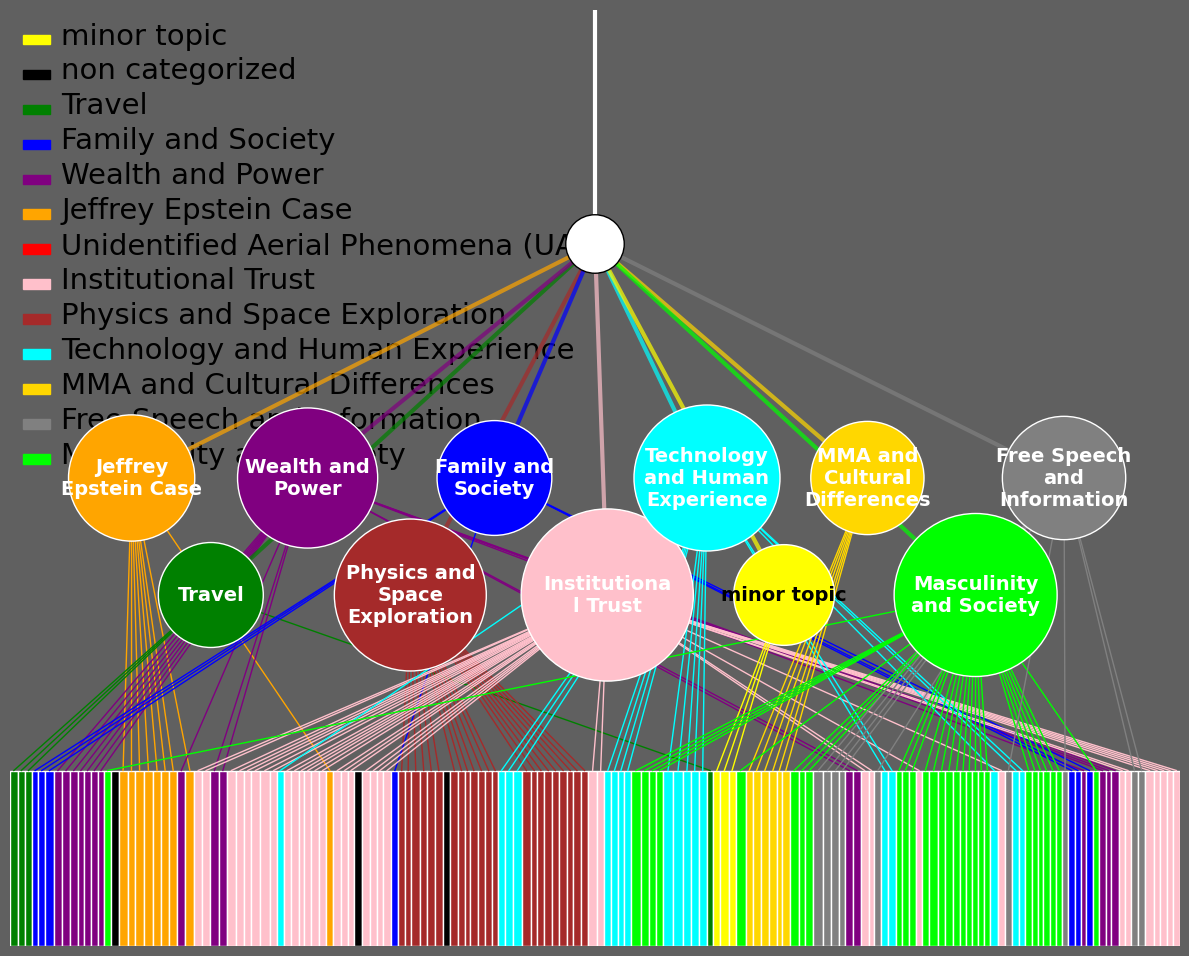

In [38]:
# Create the plot with a specific gray background
fig, ax = plt.subplots(figsize=(12, 10))
fig.patch.set_facecolor('#606060')  # Set figure background to [96, 96, 96]
ax.set_facecolor('#606060')  # Set axes background to [96, 96, 96]
target_plot_width=10


# Plot BAR 
current_x = 0
category_info = defaultdict(lambda: {"total_width": 0, "segments": []})

bar_height = 1.5

for i, segment in enumerate(segments):
    ax.add_patch(plt.Rectangle((current_x, 0), segment['width'], bar_height, 
                               facecolor=segment['color'], edgecolor='white'))
    category_info[segment['category']]['total_width'] += segment['width']
    category_info[segment['category']]['segments'].append((current_x, segment['width']))
    category_info[segment['category']]['color'] = segment['color']
    
    current_x += segment['width']

total_width = current_x
print("Total width:", total_width)







# sort category items by the same order as the category_locations
category_info=dict(sorted(category_info.items(), key=lambda item: category_locations[item[0]]))


# Calculate Circle Padding
circle_zone_size=9
circle_y = 3.5
circle_size_variable = 0.15

current_x=(target_plot_width-circle_zone_size)/2
circle_x_locations={}
total_circles_width=0
def get_circle_width(total_width):
    return (((np.sqrt(total_width) * circle_size_variable)*2)+0.3)

for category, info in category_info.items():
    if category == 'non categorized':
        pass
    else:
        circle_width=get_circle_width(info['total_width'])
        circle_x_locations[category]=circle_width
        total_circles_width+=circle_width
number_of_circles=len(circle_x_locations)
between_circle_padding=(circle_zone_size-total_circles_width)/(number_of_circles+1.15)



alterating_bool=False
vertical_offset=0
circle_centers = []
for category, info in category_info.items():
    if category == 'non categorized':
        continue

    circle_applied_size=get_circle_width(info['total_width'])

    # Calculate x position for the circle (center of all segments of this category)
    circle_x = current_x + circle_applied_size
    if alterating_bool:
        alterating_bool=False
        vertical_offset=-0.5
    else:
        vertical_offset=0.5
        alterating_bool=True

    # Store circle center, color, and size for later use
    circle_size = np.sqrt(info['total_width']) * circle_size_variable
    circle_applied_y=circle_y+vertical_offset
    circle_centers.append((circle_x, circle_applied_y, info['color'], circle_size))
    
    # DRAW LINES
    for segment_start, segment_width in info['segments']:
        segment_center = segment_start + segment_width / 2
        ax.plot([segment_center, circle_x], [bar_height, circle_applied_y], 
                color=info['color'], linewidth=1)  
        
    # PLOT CIRCLES
    circle = plt.Circle((circle_x, circle_applied_y), circle_applied_size, 
                        facecolor=info["color"], edgecolor='white', zorder=10)
    ax.add_artist(circle)

    # PLOT CIRCLE LABELS, set width to circle size and wrap
    text_wrap=textwrap.fill(category, width=12)
    bubble_font_size_text=14
    if info["color"]=="yellow":
        # make it bold and have a white border
        ax.text(circle_x, circle_applied_y, text_wrap, ha='center', va='center', color='black', fontsize=bubble_font_size_text, zorder=11, fontweight='bold')#, bbox=dict(facecolor='yellow', edgecolor='black', boxstyle='round,pad=0.2'))
    else:
        ax.text(circle_x, circle_applied_y, text_wrap, ha='center', va='center', color='white', fontsize=bubble_font_size_text, zorder=11, fontweight='bold')

    # current_x += (info['total_width']*circle_mutlipler)+0.1
    current_x +=between_circle_padding+circle_applied_size
    print("Circle current x:", current_x)



# Add central white circle
central_y = 6
central_circle = plt.Circle((total_width/2, central_y), 0.25, 
                            facecolor='white', edgecolor='black', zorder=12)
ax.add_artist(central_circle)

# Connect category circles to central circle with colored lines
for circle_x, circle_y, color, circle_size in circle_centers:
    ax.plot([circle_x, total_width/2], [circle_y, central_y], 
            color=color, linewidth=3, linestyle='-', alpha=0.7, zorder=9)  # Increased linewidth

# Add white line extending upward from central circle
top_y = 100  # Adjust this value to change the length of the line
ax.plot([total_width/2, total_width/2], [central_y, top_y], 
        color='white', linewidth=3, solid_capstyle='round')  # Added white line

# Customize the plot
ax.set_xlim(0, total_width)
ax.set_ylim(0, 8)
ax.set_aspect('equal', adjustable='box')
ax.axis('off')

# Add a Legend
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in color_dict.values()]
legend_labels = list(color_dict.keys())
ax.legend(legend_handles, legend_labels, loc='upper left', frameon=False)
# increase legend font size
plt.setp(ax.get_legend().get_texts(), fontsize='21')



plt.tight_layout()
plt.savefig('segment_central_hub_chart.png', dpi=300, bbox_inches='tight')
plt.show()

In [39]:
from PIL import Image

# Open the image file
img = Image.open('segment_central_hub_chart.png')

# Make the background transparent
img = img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    # if pixel is value [96, 96, 96] then set pixel to transparent
    if item[0] == 96 and item[1] == 96 and item[2] == 96:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

# Update image data
img.putdata(newData)

# Save the new image
img.save("segment_central_hub_chart_transparent.png", "PNG")

# Extra results prcessing

In [25]:
annotations_segemnts_str=""

for i, annoation_result in enumerate(annotated_results):
    annotations_segemnts_str+="Segment: "+str(i)+": "+annoation_result["annotation"]+"\n"
len(annotations_segemnts_str)

35534

In [ ]:
Major Topics:

Category: 'Chevron Deference Doctrine' | Context: Discussion of the Supreme Court's recent decision overturning the Chevron deference doctrine, its implications for administrative law, and the debate surrounding judicial deference to administrative agencies.

Category: 'Gun Control and Regulations' | Context: Detailed examination of bump stocks, their functionality, legal classification, and the broader debate on gun control laws, including Destiny's views on machine gun regulations.

Category: 'American Identity and Political Division' | Context: Reflection on core American values, current political divisions particularly regarding Trump supporters, and concerns about some conservatives departing from traditional American values.

Category: 'Legal and Constitutional Issues' | Context: Analysis of Supreme Court decisions, discussions on stare decisis, the role of courts versus agency expertise in interpreting laws, and examination of separation of powers.

Minor Topics:
- 'Destiny's personal experiences with firearms'
- 'Specific Supreme Court cases (e.g., Ohio v. EPA)'
- 'January 6th events and its classification as an insurrection'
- 'Historical events like Vietnam War and Civil Rights movement'
- 'Federalist Society's role in pushing for deregulation'
- 'Qualified immunity'
- 'Writing styles of Supreme Court justices'
- 'UN resolutions and Israel-Palestine conflicts'
- 'Potential review of "Project 2025" from the Trump campaign'
- 'Length and definition of a Supreme Court term'
- 'Legal concepts like "arbitrary and capricious" standard'
- 'Section 3 of the 14th Amendment case related to Trump's eligibility'
- 'Past arguments with Nick Fuentes about ethnic character of the US'

In [26]:
system_prompt="""Take the annotated segments from the user and break down the segments into a few major topics and minor topics. Format the response as follows:

Main Topics:
Category: 'Category' | Context: context
...

Minor topics:
- 'minor topic'
...

"""

user_prompt="Here are all the annotationed segments:\n"+annotations_segemnts_str

prompt=[{"role":"system", "content":system_prompt}, {"role":"user", "content":user_prompt}]

In [27]:
topic_annotations_str2, cost=await utils.async_response_handler(
    prompt,
    utils.ModelNameEnum.claude_3_5_sonnet
)

In [28]:
print(topic_annotations_str2)

Main Topics:
Category: Travel | Context: Personal experiences and reflections on travel after raising children
Category: Family and Society | Context: Importance of family ties and multi-generational living
Category: Wealth and Power | Context: Interactions with wealthy individuals and their mindsets
Category: Jeffrey Epstein Case | Context: Personal encounter and speculations about Epstein's background
Category: Unidentified Aerial Phenomena (UAPs) | Context: Recent developments and theories surrounding UAPs
Category: Institutional Trust | Context: Erosion of trust in institutions and challenges in discerning truth
Category: Physics and Space Exploration | Context: Limitations of current physics theories and the need for breakthroughs
Category: Technology and Human Experience | Context: Impact of technology on human connections and experiences
Category: MMA and Cultural Differences | Context: Analysis of McGregor-Nurmagomedov rivalry
Category: Free Speech and Information | Context: Ch